# Gradient Descent

# Background
# MSE CostFunction

# Example 1:
## Gradient Descent Minimization
######                                                                  j(theta)=theta_square
###### And we have to find the value of theta which minimises J(thta)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
theta=3
alpha=.1
dat=[]
for oo in range(10):
    res=.1*2*theta  # update rule
    print("{0:.4f} {1:.4f}".format(theta,res))
    dat.append([theta,theta**2])
    theta=theta-res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [3]:
temp=pd.DataFrame(dat)
temp


,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


Text(0, 0.5, 'j(theta)')

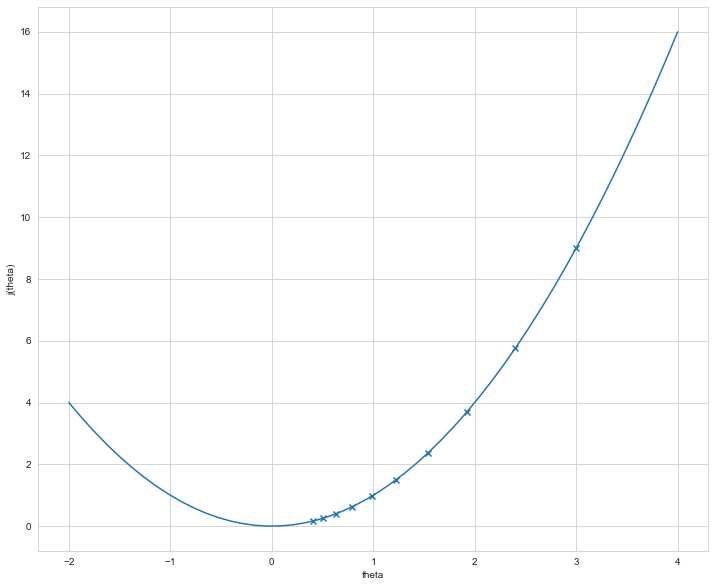

In [4]:
plt.figure(figsize=(12,10))
plt.plot(np.linspace(-2,4,50),np.linspace(-2,4,50)**2);  #plot of cost function(theta,theta_square)
plt.scatter(temp.iloc[:,0],temp.iloc[:,1],marker='x');
plt.xlabel('theta')
plt.ylabel('j(theta)')

In [5]:
np.linspace?

# Second Example
######                     J(theta)=theta4+theta2
######                     derivative of J(theta)=4*theta3+2*theta
######                     theta:=theta-alpha*(4*theta3+2*theta)

In [6]:
theta=3
alpha=.01
dat=[]
for oo in range(10):
    res=alpha*(4*(theta**3)+2*theta)
    print("{0:.4f} {1:.4f}".format(theta,res))
    dat.append([theta,theta**4 + theta**2])
    theta=theta-res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [7]:
tmp=pd.DataFrame(dat)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


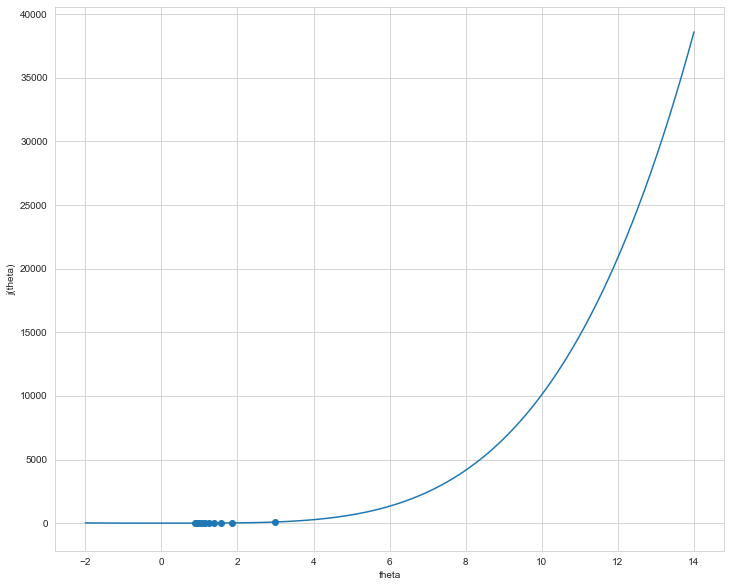

In [8]:
plt.figure(figsize=(12,10))
x_grid=np.linspace(-2,14,100)
plt.plot(x_grid,x_grid**4 + x_grid**2);
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1],marker='o')
plt.xlabel("theta")
plt.ylabel('j(theta)')
plt.show()

## Cost Function
$$j(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)}-y^{(i)})^2$$
## Derivative of Cost Function
$$\frac{d}{d\theta}J(\theta)=\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)}-y^{(i)}) \times x^{(i)} $$

## Update Rule
$$\theta_i:=\theta_i-\alpha\frac{d}{d\theta}j(\theta)$$

Substitute derivative of cost function to update rule

$$\theta_i:=\theta_i-\alpha \times \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)}-y^{(i)}) \times x^{(i)0} $$
Simplifying everything,our gradient for the coefficient of x is just the average of our predicted values multiplied by their respective x value.

# Apply Gradient Descent to Boston Housing project

In [9]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X=df[['LSTAT']].values  #column vector
y=boston_data.target


In [11]:
print(y.shape)

(506,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_std=sc_x.fit_transform(X)

y_std=sc_y.fit_transform(y.reshape(-1,1)).flatten()  
x_std.shape

(506, 1)

In [13]:
print(y_std.shape) #this show that y_std is dimensionless vector or 0 dimension vector

(506,)


In [14]:
alpha=.0001
w_=np.zeros(1+x_std.shape[1]) #of (1X2)matrix genertae
cost_=[]
n_=100  #no. of iteration
for i in range(n_):
    y_pred = np.dot(x_std,w_[1:])+w_[0]  #h(theta)=theta(1) + x*theta(2)
    #theta1=w_[0]    ,  theta2=w_   , x=x_std
    errors = (y_std-y_pred) # this is also a dimensionless vector
    
    w_[1:] += alpha*x_std.T.dot(errors)  #we use this when we get zero dim matrix and we requrire to multiply element to element
    # we use matrix multiplication
    w_[0] +=alpha * errors.sum()

    cost=(errors**2).sum()/2.0
    cost_.append(cost)


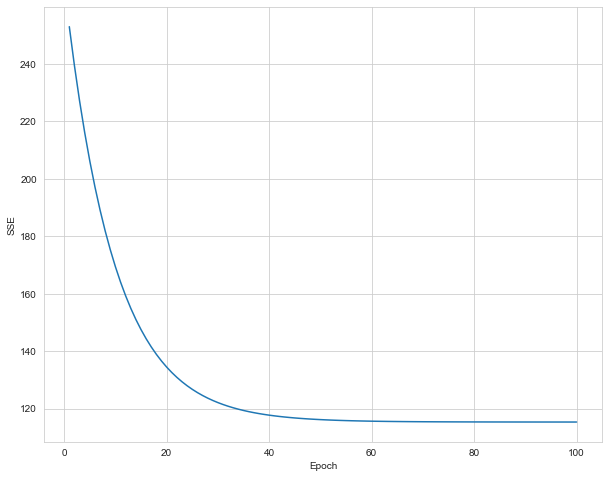

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch');